In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 

%reload_ext autoreload
%aimport Funcs
%aimport parameters
%aimport fluid_flow

from fluid_flow import dt_fluid_flow
from Funcs import advance_adv_diff_RK3, advance_adv_diff_RK4
from fluid_flow import advance_fluid_flow, set_boundary

In [2]:
dx, dy, Ns_c, Nc_lw = parameters.set_resolution(30,30)
dt = dt_fluid_flow(dx, Fo=0.3) 
dt

9.512485136741975e-05

In [3]:

#dt_safe = dt_fluid_flow(dx, Fo=0.3) 
#Dt = dt_fluid_flow(dx, Fo=FO) 
#Dt = dt_safe * np.ones(1)
#Dt = np.array([1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 10e-5]) / 4

def stability_anal(N, FO):
    
    dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,N)
    
    Dt = dt_fluid_flow(dx, Fo=FO) 
    Energ = np.zeros((Dt.size)) # placeholder for energy measurement

    # loop over given number of iterations 
    # (note: the first time this line is executed it takes long since numba needs to compile a lot):
    for i, dt in enumerate(Dt):
        
        Nt = int(np.round(5 * 9.5e-5 / dt))

        # initial setup of velocity field
        u0 = np.zeros((N,N))
        v0 = np.copy(u0)
        u0,v0 = set_boundary(u0,v0, Nc_lw, Ns_c)

        u, v = np.copy(u0), np.copy(v0)
        
        # actual iteration
        u, v, P, is_c,_ = advance_fluid_flow(Nt, u, v, advance_adv_diff_RK4, dt, maxit=2000, atol=1e-2)

        Energ[i] = np.mean(u**2 + v**2)
        
        if is_c == False:
            Energ[i:] = Energ[i]
            break
            
    return Dt, Energ
    

In [4]:
FO = np.linspace(0.25, 0.45, 5)
FO

array([0.25, 0.3 , 0.35, 0.4 , 0.45])

In [9]:
FO = np.linspace(0.25, 0.4, 8)
N = 100
Dt, Energ = stability_anal(N, FO)

did not converge within the maximum number of iterations


Text(0.5, 0, 'Fourier number Fo')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
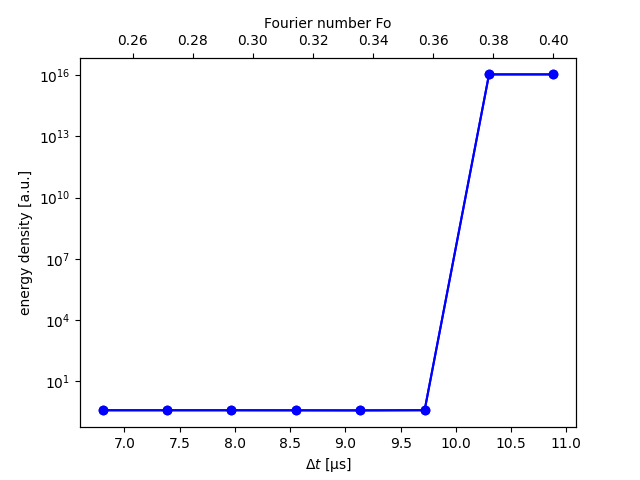

In [10]:

fig, ax = plt.subplots()
ax.plot(Dt * 1e6, Energ, 'bo-')
ax.set_ylabel('energy density [a.u.]')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\Delta t$ [µs]')
ax2 = ax.twiny()
ax2.plot(FO, Energ, 'bo-')
ax2.set_xlabel('Fourier number Fo')

did not converge within the maximum number of iterations
did not converge within the maximum number of iterations
did not converge within the maximum number of iterations
did not converge within the maximum number of iterations


<ipython-input-21-4f6796c040f5>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(xx, yy, zz, vmin=0.25, vmax=1)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
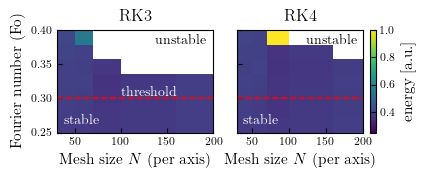

In [21]:
from pathlib import Path
from plotting import set_size
figsize = set_size(fraction=0.7, aspect_r = 0.3)
fig, axs = plt.subplots(1,2,figsize=figsize, sharex=True, sharey=True)
plt.style.use('tex.mplstyle')

titles = ['RK3', 'RK4']
paths = [Path('data/vel_field/stability_anal{}.npy'.format(s)) for s in ['', '_RK4']]
for i, p in enumerate(paths):
    
    ax = axs[i]
    N_list,FO,ENERG = np.load(p, allow_pickle=True)

    xx, yy = np.meshgrid(N_list, FO)
    #xx = np.repeat(N_list.reshape(1, -1), FO.size, axis=0)
    #yy = DT.T
    zz = ENERG.T
    im = ax.pcolormesh(xx, yy, zz, vmin=0.25, vmax=1)
    ax.text(0.95, 0.95, 'unstable', transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
    ax.text(0.05, 0.05, 'stable', transform=ax.transAxes, horizontalalignment='left', verticalalignment='bottom', color='white')
    
    ax.set_xlabel('Mesh size $N$ (per axis)')
    ax.axhline(0.3, color='red', ls='--')
    if i == 0:
        ax.text(100, 0.3, 'threshold', color='white', verticalalignment='bottom')
        ax.set_ylabel('Fourier number (Fo)')
    if i == 1:
        fig.colorbar(im, ax=ax, label='energy [a.u.]')
    ax.set_title(titles[i])

plt.tight_layout()

In [22]:
fig.savefig('figures/stability_anal_RK3_vs_RK4.svg')

In [14]:
from pathlib import Path
p = Path('data/vel_field/stability_anal_RK4.npy')
#np.save(p, np.array([N_list,FO,ENERG], dtype='object'))

In [43]:
N_list,FO,ENERG = np.load(p, allow_pickle=True)

In [ ]:
#N_list = np.array([30, 50, 70, 100, 130, 160, 200, 250])
N_list = np.array([30, 50, 70, 100, 160, 200])

FO = np.linspace(0.25, 0.4, 8)
ENERG = np.zeros((N_list.size, FO.size))
DT = np.zeros_like(ENERG)
for i, N in enumerate(N_list):
    Dt, Energ = stability_anal(N, FO)
    
    ENERG[i] = Energ
    DT[i] = Dt    

In [ ]:
ENERG[ENERG > 10] = np.nan